In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import csv
import numpy as np

In [2]:
 location = "D:/Harshavardan/data/"
#location = "//storage.ncbs.res.in/harshavardanbn/data/tap_us/210711/F1"
files = 105
fps = 100

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


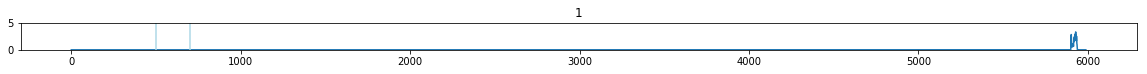

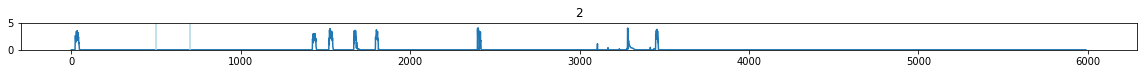

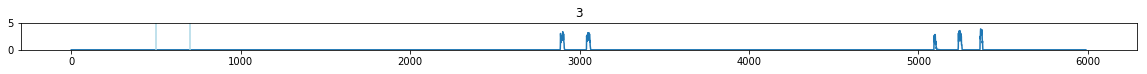

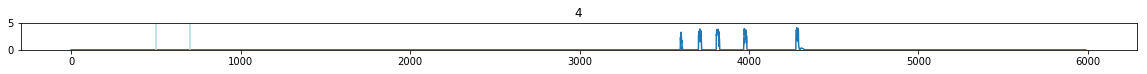

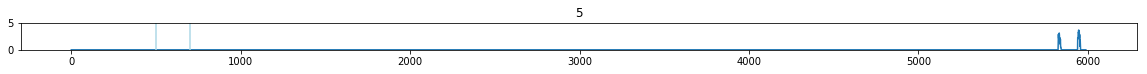

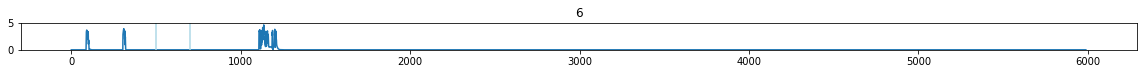

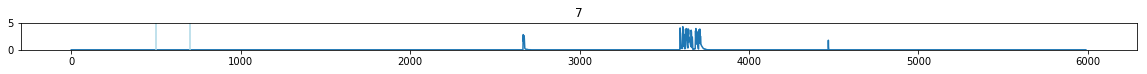

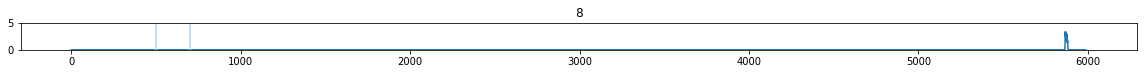

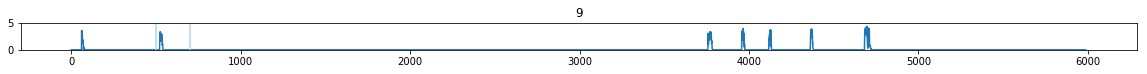

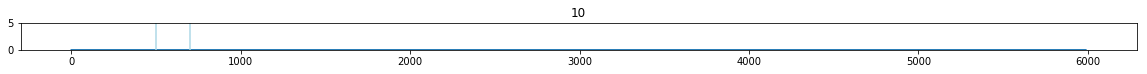

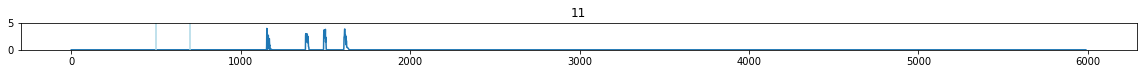

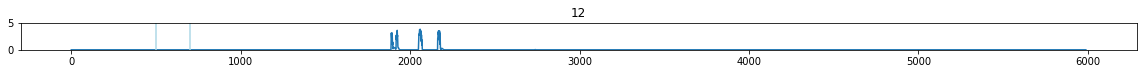

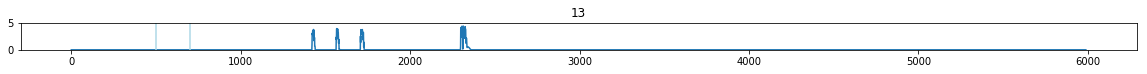

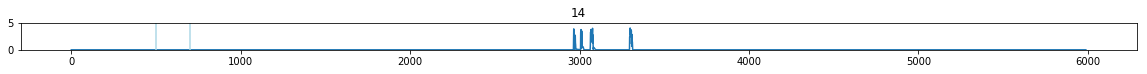

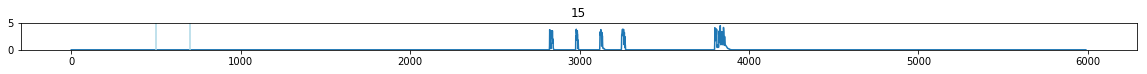

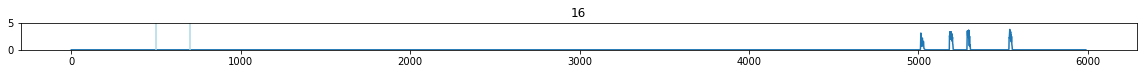

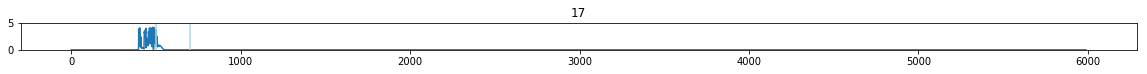

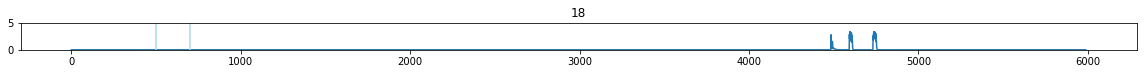

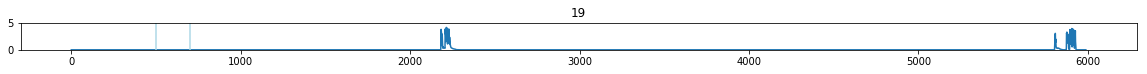

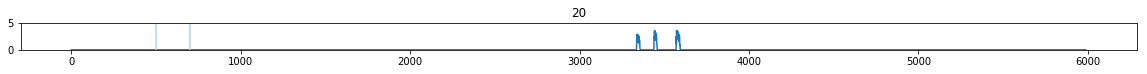

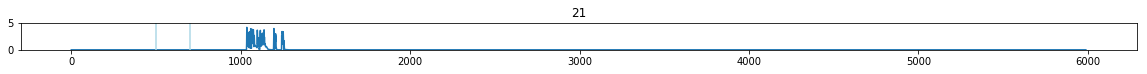

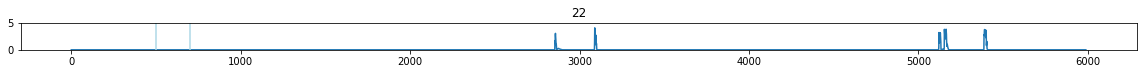

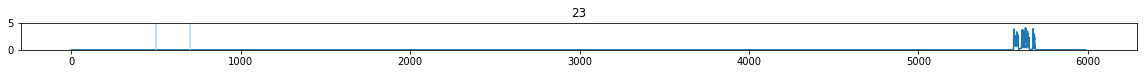

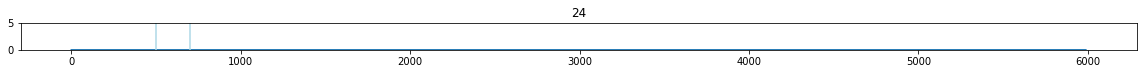

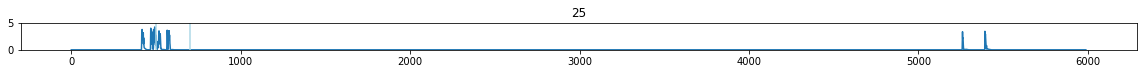

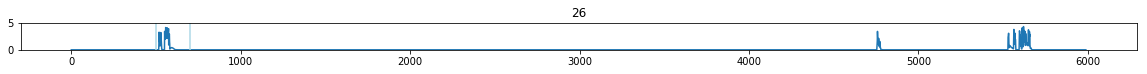

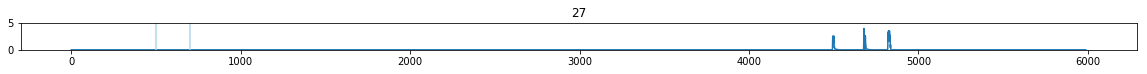

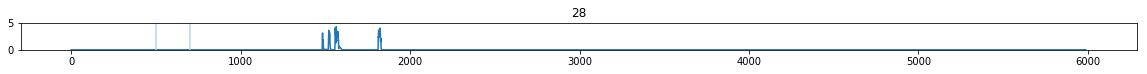

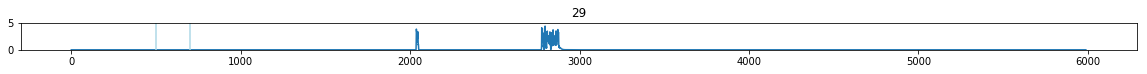

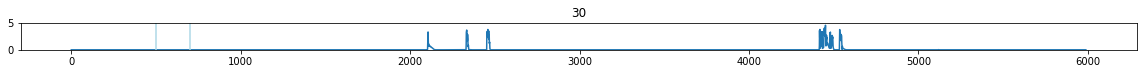

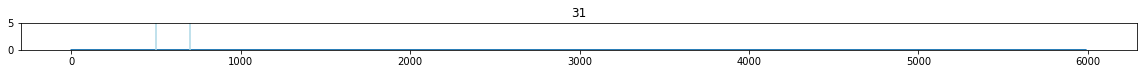

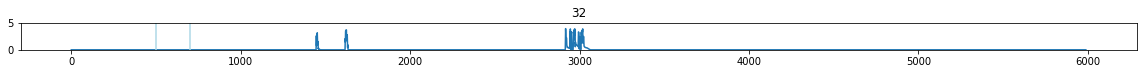

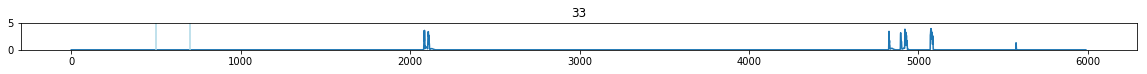

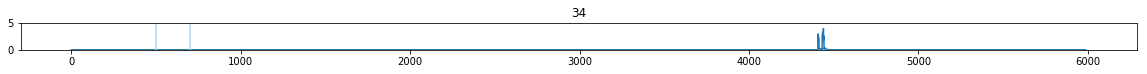

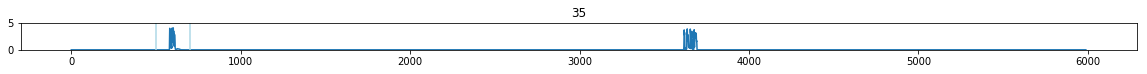

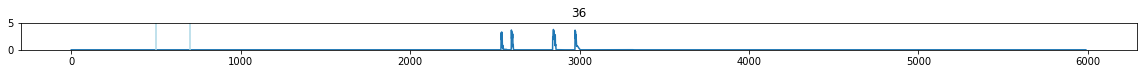

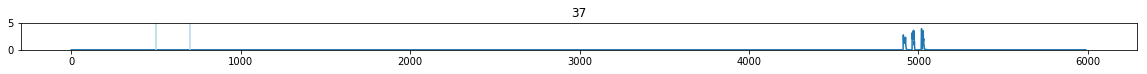

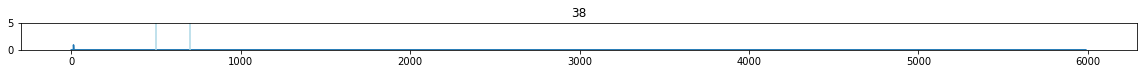

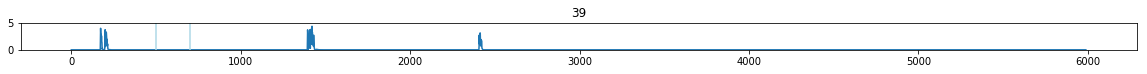

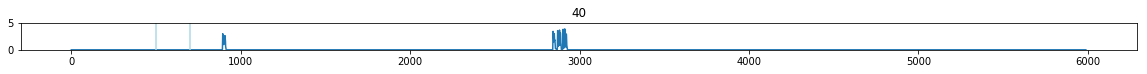

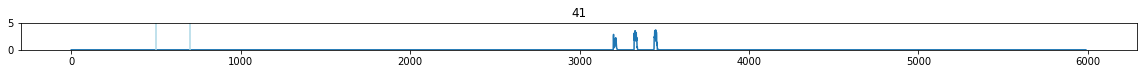

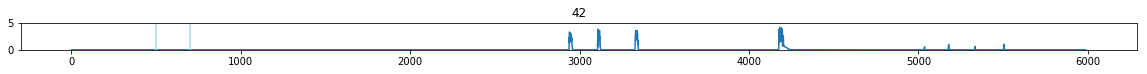

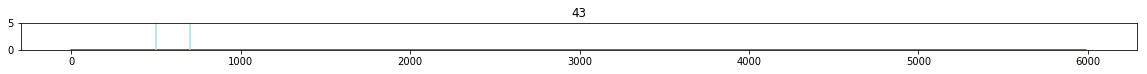

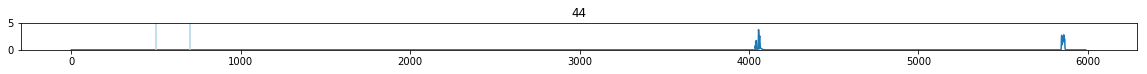

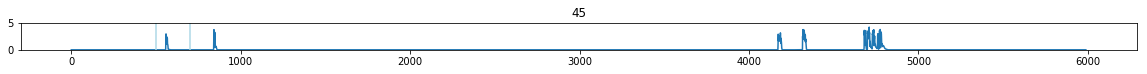

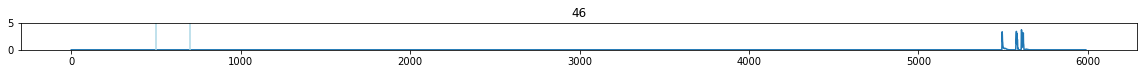

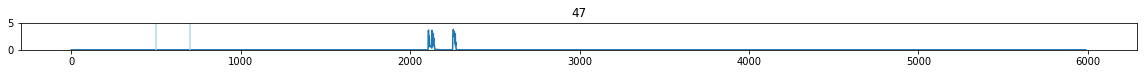

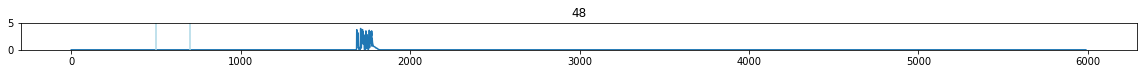

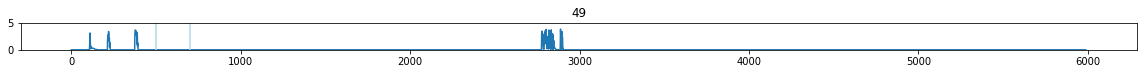

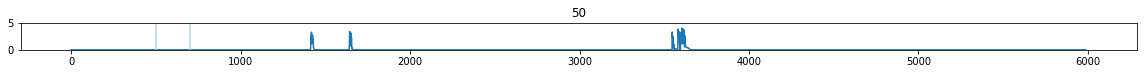

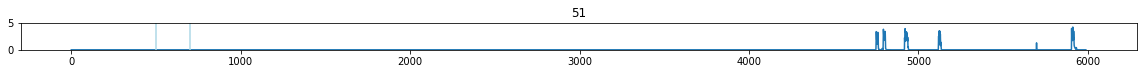

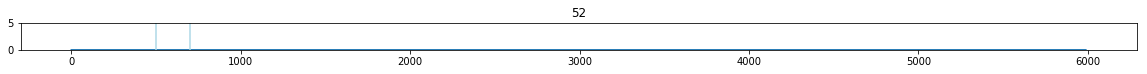

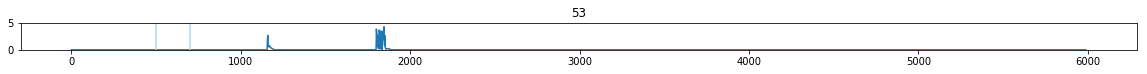

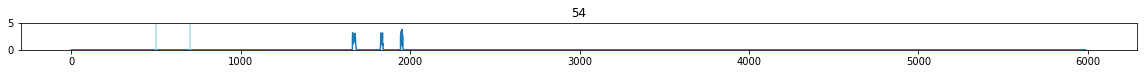

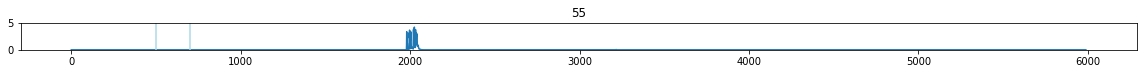

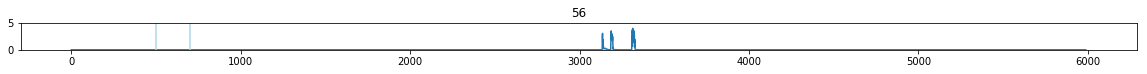

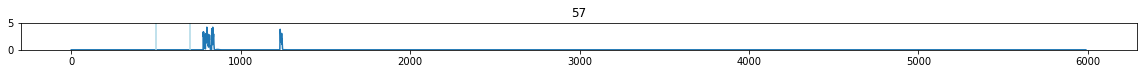

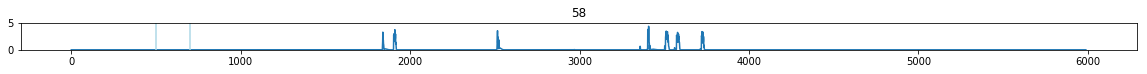

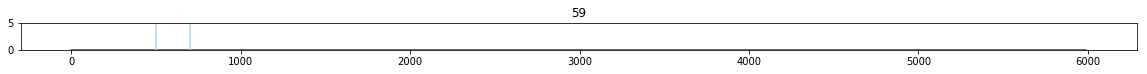

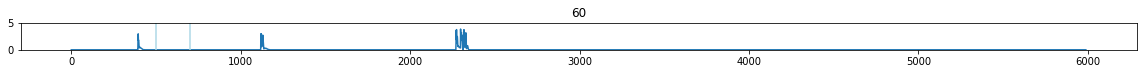

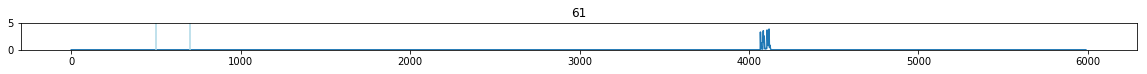

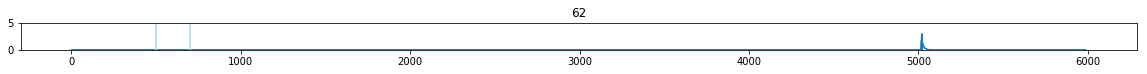

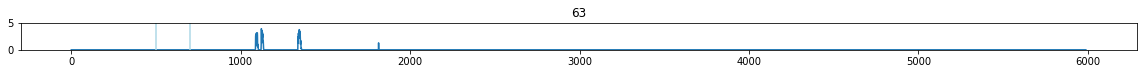

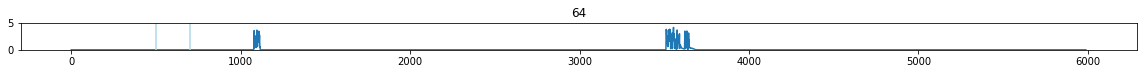

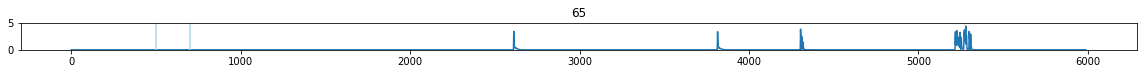

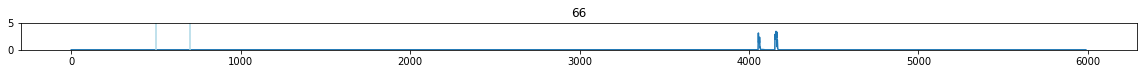

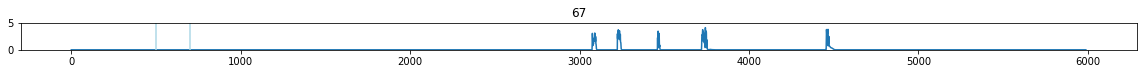

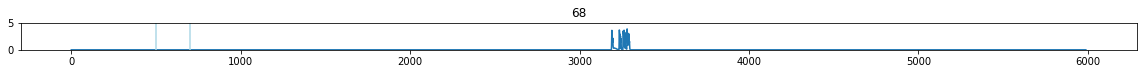

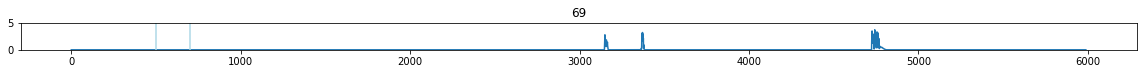

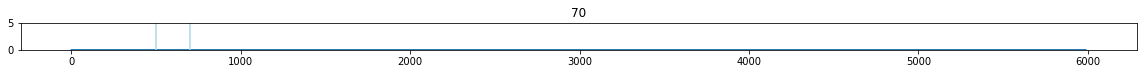

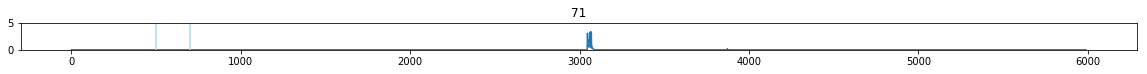

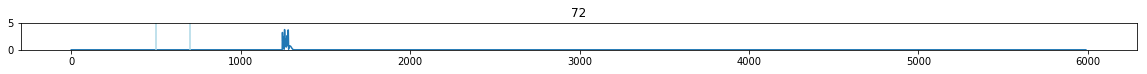

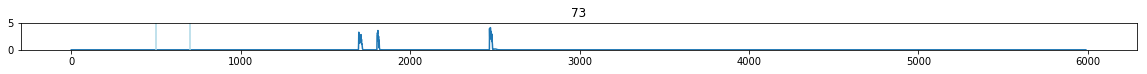

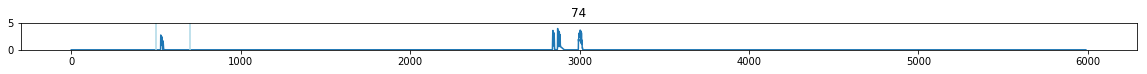

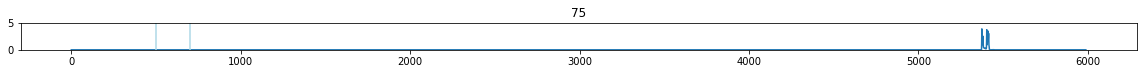

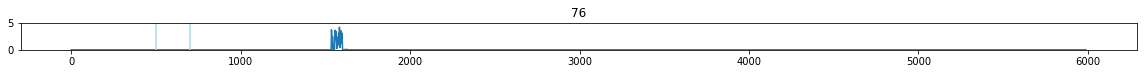

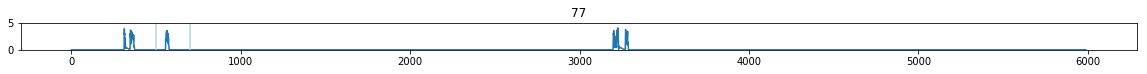

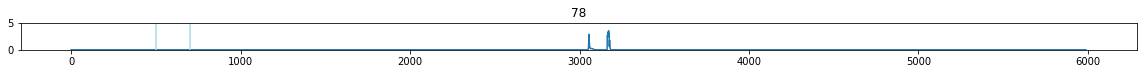

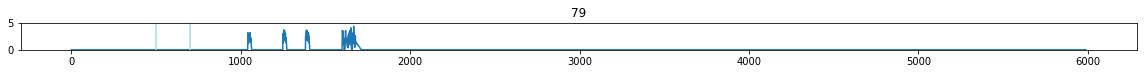

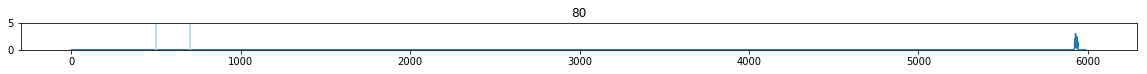

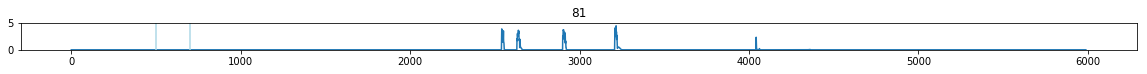

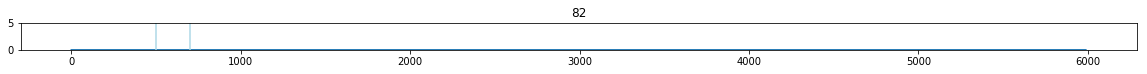

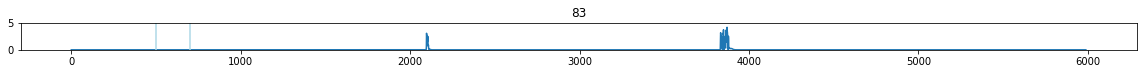

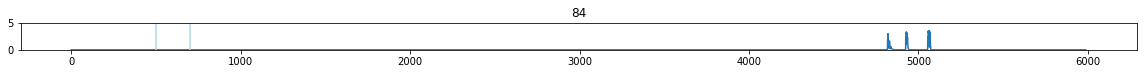

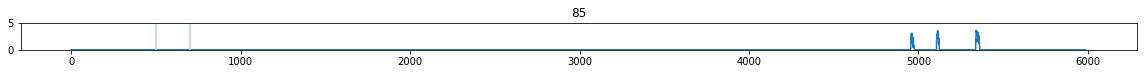

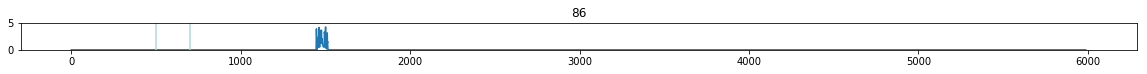

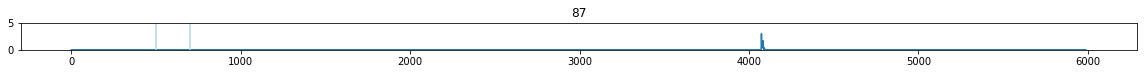

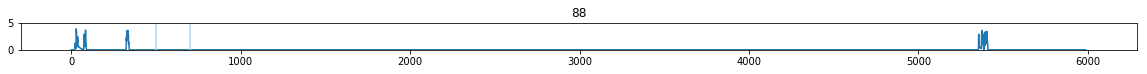

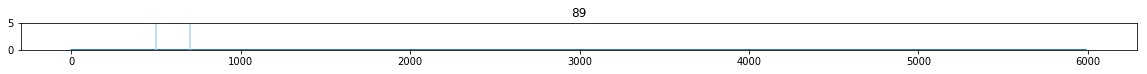

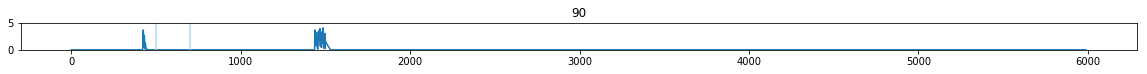

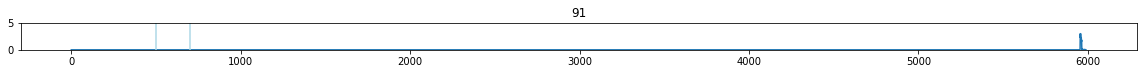

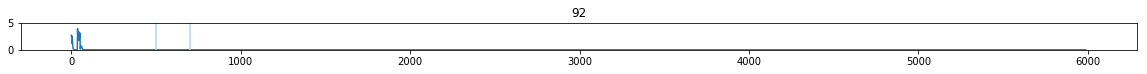

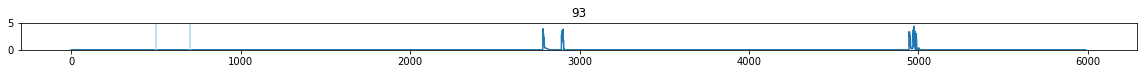

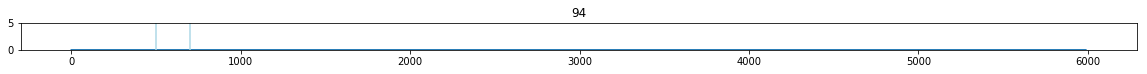

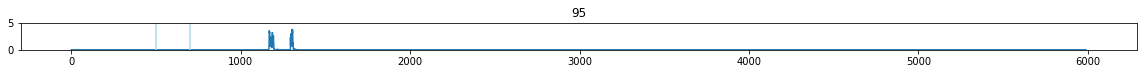

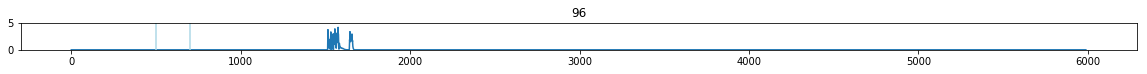

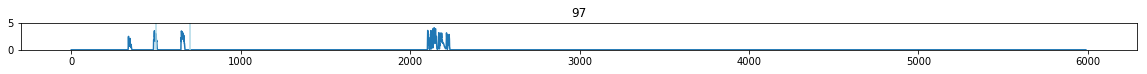

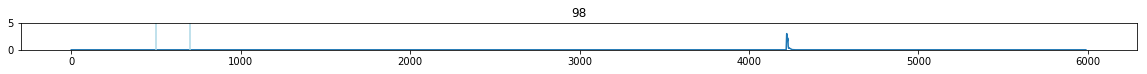

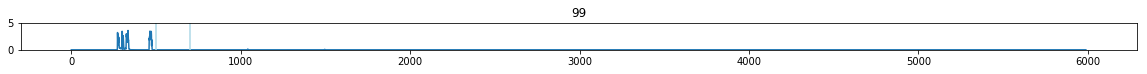

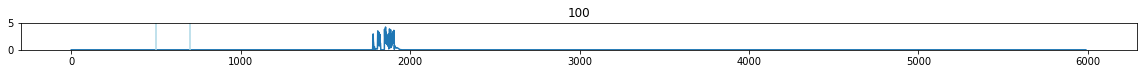

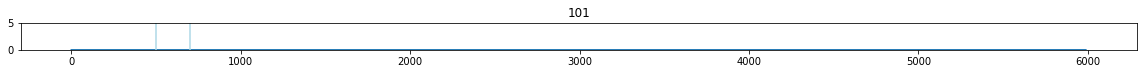

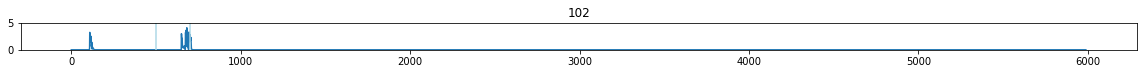

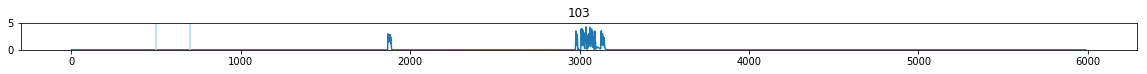

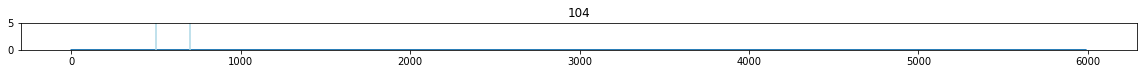

In [3]:
all_trials = []
for i in range(1, files):
    temp = []
    with open(location + "/rawmotion" + str(i) + ".csv", "r") as file:
        reader = csv.reader(file)
        for row in reader:
            temp.append(float(row[0]))
    all_trials.append(temp[:5990])
    plt.figure(figsize = (20, 0.5))
    plt.plot(all_trials[-1][:])
    plt.ylim(0, 5)
    plt.title(i)
    plt.plot([500, 500], [0, 5], c = "lightblue")
    plt.plot([700, 700], [0, 5], c = "lightblue")
all_trials = np.array(all_trials)

In [4]:
# for i in range(0, 5):
#     plt.figure(figsize = (20, 2))
#     plt.plot(all_trials[i][:1200])
#     plt.ylim(0, 5)
#     plt.plot([500, 500], [0, 5], "k")
#     plt.plot([700, 700], [0, 5], "k")
#     plt.title("CS " + str(i + 1))
#     if i == 0:
#         avg_cs = np.array(all_trials[i][:1200]) / 5
#     else:
#         avg_cs = avg_cs + np.array(all_trials[i][:1200]) / 5

# plt.figure(figsize = (20, 5))
# plt.plot(avg_cs)
# plt.ylim(0, 1)
# plt.plot([500, 500], [0, 5], "k")
# plt.plot([700, 700], [0, 5], "k")
# plt.title("Average CS")

In [5]:
# for i in range(5, 10):
#     plt.figure(figsize = (20, 2))
#     plt.plot(all_trials[i][:1200])
#     plt.ylim(0, 5)
#     plt.title("US " + str(i - 4))
#     if i == 5:
#         avg_us = np.array(all_trials[i][:1200]) / 5
#     else:
#         avg_us = avg_us + np.array(all_trials[i][:1200]) / 5

# plt.figure(figsize = (20, 5))
# plt.plot(avg_us)
# plt.ylim(0, 1)
# plt.title("Average US")

# # plt.figure(figsize = (20, 10))
# # plt.plot(all_trials[5][480:520])

In [6]:
# for i in range(10, 99):
#     plt.figure(figsize = (20, 2))
#     plt.plot(all_trials[i][:1200])
#     plt.ylim(0, 5)
#     plt.plot([500, 500], [0, 5], "k")
#     plt.plot([700, 700], [0, 5], "k")
#     plt.title("Training " + str(i - 9))
#     if i == 10:
#         avg_tr = np.array(all_trials[i][:1200]) / 100
#     else:
#         avg_tr = avg_tr + np.array(all_trials[i][:1200]) / 100

# plt.figure(figsize = (20, 5))
# plt.plot(avg_tr)
# plt.ylim(0, 1)
# plt.plot([500, 500], [0, 5], "k")
# plt.plot([700, 700], [0, 5], "k")
# plt.title("Average Training")

In [7]:
# for i in range(110, 115):
#     plt.figure(figsize = (20, 2))
#     plt.plot(all_trials[i][:1200])
#     plt.ylim(0, 5)
#     plt.plot([500, 500], [0, 5], "k")
#     plt.plot([700, 700], [0, 5], "k")
#     plt.title("Test " + str(i - 109))
#     if i == 110:
#         avg_te = np.array(all_trials[i][:1200]) / 5
#     else:
#         avg_te = avg_te + np.array(all_trials[i][:1200]) / 5

# plt.figure(figsize = (20, 5))
# plt.plot(avg_te)
# plt.ylim(0, 1)
# plt.plot([500, 500], [0, 5], "k")
# plt.plot([700, 700], [0, 5], "k")
# plt.title("Average Test")

In [8]:
maximum = 0
for i in all_trials:
    if max(i) > maximum:
        maximum = max(i)

all_trials /= maximum
contrast = np.round((all_trials - np.min(all_trials)) / (np.max(all_trials) - np.min(all_trials)) * 255)

Text(0.5,1,'D:/Harshavardan/data/')

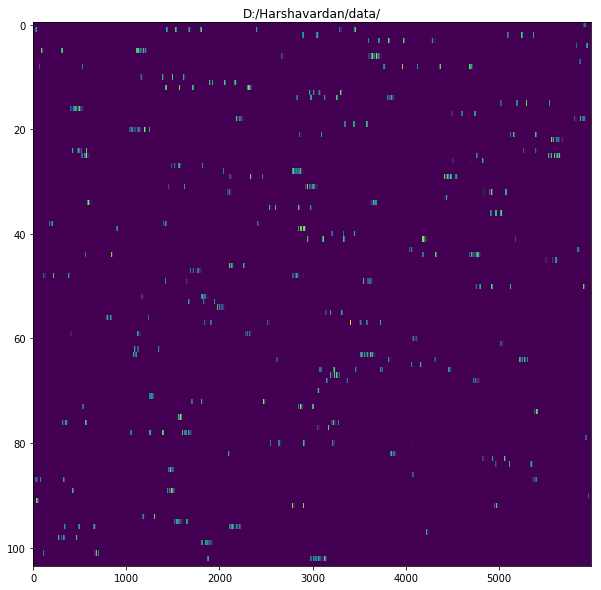

In [9]:
plt.figure(figsize = (10, 10))
plt.imshow(contrast, aspect = "auto")#, cmap = cm.Blues)
#plt.savefig("heatmap.png")
plt.title(location)